In [111]:
import numpy as np
import math 
import matplotlib.pyplot as plt
%matplotlib notebook

# Ларичева Мария БПМ-161
## Лабораторная работа 4. Вариант 12

### **Задача 4.1**
Дана система уравнений Ax=b. Найти решение системы с помощью метода Гаусса. Выполнить 10 итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения. 

Зададим матрицу системы $A$ и вектор правой части $b$.

In [46]:
A = np.matrix('9.9 3.0 4.0 0 1.3 1.5; 1.98 9.8 0.8 5.94 0.42 -0.6; 3.96 -4.8 19.7 9.9 0.72 0.3; 1.98 1.2 1.1 6.93 0.81 -1.2; 9.9 -7.5 2.1 -9.9 29.5 0; -2.97 -1.2 0.8 4.95 2.7 12.7')
b = np.matrix('-73.34;-37.456;-126.316;-82.528;96.66;7.41')
print("A = \n", A)
print("b = \n", b)

A = 
 [[ 9.9   3.    4.    0.    1.3   1.5 ]
 [ 1.98  9.8   0.8   5.94  0.42 -0.6 ]
 [ 3.96 -4.8  19.7   9.9   0.72  0.3 ]
 [ 1.98  1.2   1.1   6.93  0.81 -1.2 ]
 [ 9.9  -7.5   2.1  -9.9  29.5   0.  ]
 [-2.97 -1.2   0.8   4.95  2.7  12.7 ]]
b = 
 [[ -73.34 ]
 [ -37.456]
 [-126.316]
 [ -82.528]
 [  96.66 ]
 [   7.41 ]]


Найдем решение системы методом Гаусса через встроенную функцию *lsolve*

In [70]:
x1 = np.linalg.solve(A, b)
print(x1)

[[-10.12121212]
 [  4.2       ]
 [  1.6       ]
 [-10.21212121]
 [  4.2       ]
 [  1.6       ]]


In [75]:
x1 = np.asarray(x1).reshape(-1)

Преобразуем систему к удобному для итераций виду $x = Bx + c$

In [71]:
B = np.zeros(shape = A.shape)
c = np.empty(shape = A.shape[0])

for i in range(c.size):
    c[i]=b[i]/A[i,i]
    for j in range(c.size):
        if i!= j:
            B[i][j] = -A[i, j]/A[i, i]

print("B = \n", np.asmatrix(B))
print("c = \n", np.asmatrix(c))

B = 
 [[ 0.         -0.3030303  -0.4040404  -0.         -0.13131313 -0.15151515]
 [-0.20204082  0.         -0.08163265 -0.60612245 -0.04285714  0.06122449]
 [-0.20101523  0.24365482  0.         -0.50253807 -0.03654822 -0.01522843]
 [-0.28571429 -0.17316017 -0.15873016  0.         -0.11688312  0.17316017]
 [-0.33559322  0.25423729 -0.07118644  0.33559322  0.         -0.        ]
 [ 0.23385827  0.09448819 -0.06299213 -0.38976378 -0.21259843  0.        ]]
c = 
 [[ -7.40808081  -3.82204082  -6.4119797  -11.90880231   3.27661017
    0.58346457]]


Проверим выполнение необходимого условия сходимости (норма матрицы $B$ не превышает 1)

In [72]:
print("норма B: ", np.linalg.norm(B, np.inf))

норма B:  0.9989847715736041


Реализуем программно метод Зейделя решения системы линейных уравнений, предусматривающий остановку при достижении максимального числа итераций или заданной точности. С помощью функции seidel проведем 10 итераций (начальное приближение $x0$ положим равным нулевому вектору, точность $eps = 1e-6$.  

In [76]:
eps = 1e-6
def seidel(B,c,x0,max_it,eps):
    x = x0
    for i in range(max_it):
        z = x
        x = np.dot(B,z)+c
        if (np.linalg.norm(x-z,np.inf)<eps):
            return x
    return x

x2 = seidel(B,c,np.zeros(c.size),10,eps)
print(x2)

[-10.09007342   4.23518095   1.60955357 -10.18400133   4.18044634
   1.60354482]


Посчитаем величину абсолютной погрешности полученного решения

In [77]:
print("значение погрешности: ", np.linalg.norm((x2-x1), np.inf))

значение погрешности:  0.03518094654732451


Возьмем более точное приближение: пусть значение каждой координаты вектора будет отличаться от решения на 1

In [78]:
x0 = x1 - 1
x3 = seidel(B,c,x1-1,10,eps)

print("значение погрешности: ", np.linalg.norm(x3-x1, np.inf))

значение погрешности:  0.009294101221970053


Погрешность уменьшилась на порядок, поскольку начальное приближение взято точнее

### **Задача 4.2**

Для системы уравнений Ax=b из задачи 4.1 найти решение по методу Зейделя с точностью $eps = 1e-6$, взяв любое начальное приближение. Предусмотреть подсчет количества итераций, потребовавшихся для достижения точности $eps$. 

Модифицируем функцию для решения методом Зейделя таким образом, чтобы она возвращала количество итераций

In [80]:
def seidel_mod(B,c,x0,max_it,eps):
    x = x0
    for i in range(max_it):
        z = x
        x = np.dot(B,z)+c
        if (np.linalg.norm(x-z,np.inf)<eps):
            return x,i+1
    return x,i+1

Возьмем полученное выше начальное приближение $x_0$ и посчитаем количество итераций, необходимых для достижения точности $1e-6$ (для этого также поменяем максимальное количество итераций, например, на 1000)

In [84]:
x3,num = seidel_mod(B,c,x1-1,1000,eps)
print("количество итераций: ", num)

количество итераций:  29


### **Задача 4.4.6**

Дана система уравнений $x=Bx+c$, где $B=B(t)$, $t = −1, -0.8,...,0.8,1$ - параметр. Построить график(или гистограмму) зависимости нормы $B$ от параметра $t$. По графику определить, при каких перечисленных выше значениях $t$ выполнено достаточное условие сходимости итерационных методов. Найти решение системы $x=Bx+c$ с точностью $1e-5$ для наибольшего значения параметра $t$, при котором выполнено условие сходимости

In [139]:
t = -1
t_ar = np.arange(-1.0,1,0.2)
B_ar = []
c = np.array([0,1,2,3])
for t in t_ar:
    B = np.array([[-0.2,np.cos(3*t),0.1,0.3],[0.1,0.11,0.4,-0.05],[0.3,0.1,np.sin(3*t)+np.cos(2*t),0.1],[0.2,-0.12,0.1,0.09]])
    B_ar.append(np.linalg.norm(B,np.inf))
print(B_ar)

[1.5899924966004455, 1.3373937155412459, 1.1114898764015217, 0.962357754476673, 1.425335614909678, 1.6, 1.98570346739792, 2.128745795314392, 1.8362053853548699, 1.3373937155412448]


<IPython.core.display.Javascript object>


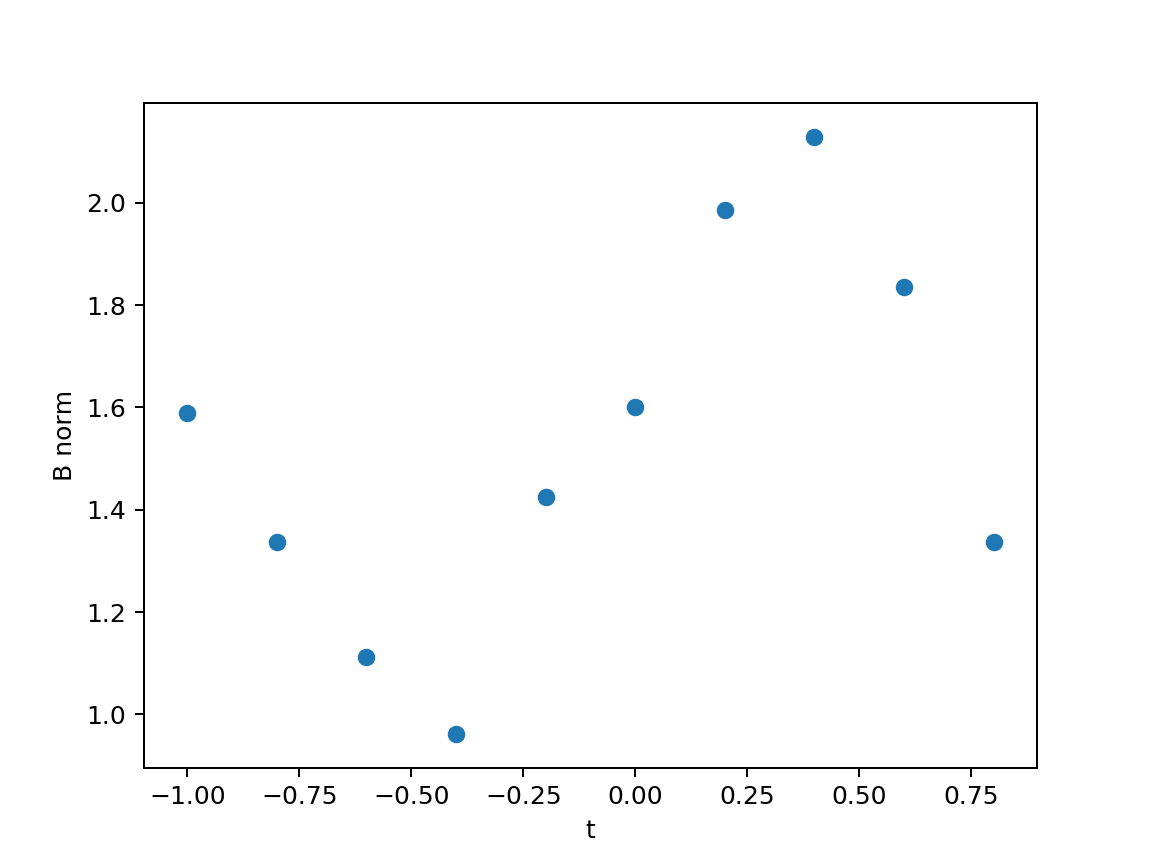

In [133]:
plt.scatter(t_ar,B_ar)
plt.xlabel("t")
plt.ylabel("B norm");

Условие сходимости выполнено только при значении $t = -0.5$. Найдем решение системы $x=Bx+c$ с точностью $1e-5$

In [143]:
x3 = seidel(B,c,np.zeros(c.size),100,1e-5)
print("x = ", x3)

x =  [-0.99875107  3.90257081  6.84728222  3.31501827]


### **Задача 4.7.3**

Дана система уравнений $Ax=b$, где $A$ – симметричная положительно определенная матрица размерности $n х n$. Найти решение системы с точностью $1e-6$ с помощью метода простой итерации с оптимальным выбором итерационного параметра, а также с помощью метода релаксации. Сравнить скорость сходимости методов.
УКАЗАНИЕ. При проверке необходимого и достаточного условия сходимости итерационных методов для нахождения собственных значений матриц воспользоваться встроенной функцией eigenvals(M) пакета MATHCAD (либо функцией numpy.linalg.eigvals), возвращающей собственные значения матрицы M. 

Зададим матрицу $A$ и вектор $b$

In [183]:
n = 40
m = 3
q = 0.993+(-1)**m*m*10**(-4)
tau = np.sum([q**(2*i) for i in range(1,n+1)])
t = n+m

b = np.array([t*q**(i) for i in range(1,n+1)])

In [205]:
A = np.ones((n, n))
for i in range(n):
    for j in range(n):
        if (i == j):
            A[i][j] = tau+2*q**(i)*t+t**2
        else:
            A[i][j] = tau + (q**i + q**j)*t
x0 = np.linalg.solve(A, b)

Опишем метод релаксации с помощью функции $rel$

In [207]:
def rel(B,c,x0,w,max_it,eps):
    x=x0
    for i in range(max_it):
        z=x
        x=np.dot(B,z)+c
        x=x*w+z*(1-w)
        if (np.linalg.norm(x-z,np.inf)<eps):
            return x,i+1   
    return x,i+1

Преобразуем систему к удобному для итераций виду $x = Bx + c$

In [202]:
B = np.zeros((n,n))
c = np.zeros(n)

for i in range(n):
    c[i]=b[i]/A[i][i]
    for j in range(n):
        if i!= j:
            B[i][j] = -A[i, j]/A[i, i]

Вычислим наилучшее значение параметра $w$ для метода релаксации

In [214]:
ws=np.linspace(0.1,2,40)
ls=[]
for w in ws:
    x,nm=rel(B,c,x0+1,w,200,1e-6)
    ls.append(nm)
#print(ls)
#print(ws)
index = ls.index(min(ls))
w_opt = ws[index]
print("оптимальное значение w: ", w_opt)
print("решение x: ", rel(B,c,x0+1,w_opt,200,1e-6)[0])

оптимальное значение w:  0.441025641025641
решение x:  [0.00837882 0.0082519  0.0081259  0.00800082 0.00787666 0.0077534
 0.00763104 0.00750957 0.00738899 0.00726929 0.00715046 0.0070325
 0.0069154  0.00679916 0.00668376 0.00656921 0.00645549 0.0063426
 0.00623053 0.00611929 0.00600885 0.00589922 0.00579039 0.00568236
 0.00557511 0.00546864 0.00536296 0.00525804 0.00515389 0.0050505
 0.00494786 0.00484597 0.00474483 0.00464442 0.00454475 0.0044458
 0.00434758 0.00425007 0.00415328 0.00405719]
